# Model with two time series

In [1]:
# First perform the necessary imports
import pandas as pd
import matplotlib.dates as md
import matplotlib.pyplot as plt
import pastas as ps
%matplotlib inline

### 1. Importing the dependent time series data


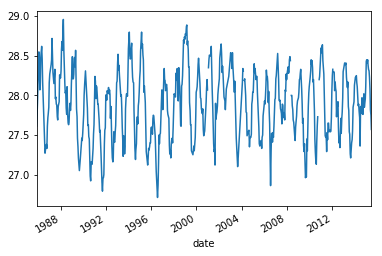

In [2]:
# Import and check the observed groundwater time series
gwdata = pd.read_csv('../data/B58C0698001_0.csv', skiprows=11,
                     parse_dates=['PEIL DATUM TIJD'],
                     index_col='PEIL DATUM TIJD',
                     skipinitialspace=True)
gwdata.rename(columns={'STAND (MV)': 'h'}, inplace=True)
gwdata.index.names = ['date']
gwdata.h *= 0.01
oseries = 30.17 - gwdata.h  # NAP
oseries.plot()

### 2. Import the independent time series

In [3]:
# Import observed precipitation series
precip = pd.read_csv('../data/Heibloem_rain_data.dat', skiprows=4, 
                     delim_whitespace=True, parse_dates=['date'], 
                     index_col='date')
precip = precip.precip
precip /= 1000.0  # Meters

# Import observed evaporation series
evap = pd.read_csv('../data/Maastricht_E_June2015.csv', 
                   skiprows=4, sep=';', parse_dates=['DATE'], 
                   index_col='DATE')
evap.rename(columns={'VALUE (m-ref)': 'evap'}, inplace=True)
evap = evap.evap

### 3. Creating the time series model

In [4]:
# Initiate the base model
ml = ps.Model(oseries)

# Add the precipitation data as explanatory variable
ts1 = ps.StressModel(precip, ps.Gamma, kind="prec", name='precip')
ml.add_tseries(ts1)

# Add the evaporation data as explanatory variable
ts2 = ps.StressModel(evap, ps.Gamma, kind="evap", name='evap')
ml.add_tseries(ts2)

# Add a noisemodel
n = ps.NoiseModel()
ml.add_noisemodel(n)

### 4. Solving and plotting the model


In [7]:
# Solve the time series model
ml.solve(tmin="1965")

2017-10-11 18:03:38,208 - pastas.model - WARNING - Specified tmin is before the first observation. tmin automatically set to 1985-11-14 00:00:00
[[Fit Statistics]]
    # function evals   = 124
    # data points      = 644
    # variables        = 8
    chi-square         = 10.684
    reduced chi-square = 0.017
    Akaike info crit   = -2623.723
    Bayesian info crit = -2587.982
[[Variables]]
    precip_A:      1282.61256 +/- 174.4502 (13.60%) (init= 491.3195)
    precip_n:      1.04115167 +/- 0.023737 (2.28%) (init= 1)
    precip_a:      223.624690 +/- 31.32965 (14.01%) (init= 100)
    evap_A:        5.55949345 +/- 2.50e+03 (44907.02%) (init= 634.8969)
    evap_n:        4.99603711 +/- 206.4343 (4131.96%) (init= 1)
    evap_a:        1546.61801 +/- 1.04e+05 (6715.67%) (init= 100)
    constant_d:    25.2658142 +/- 2.971590 (11.76%) (init= 27.90008)
    noise_alpha:   279.810323 +/- 71.10364 (25.41%) (init= 14)
[[Correlations]] (unreported correlations are <  0.100)
    C(evap_A, consta

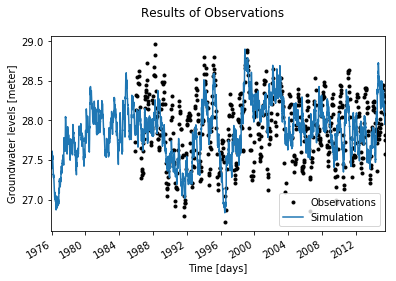

In [8]:
ml.plot();